<a href="https://colab.research.google.com/github/Raging-Silver/Mobile-Price-Prediction-Using-ML/blob/main/Mehar_Khurana_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **importing data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline

# **importing and splitting**

In [2]:
dataset=pd.read_csv('Merged_Data.csv')
Train_Data=pd.read_csv('Train_Data.csv')
Traindata_classlabels=pd.read_csv('Traindata_classlabels.csv')
Train_Data_train, Train_Data_test, Traindata_classlabels_train, Traindata_classlabels_test = train_test_split(Train_Data, Traindata_classlabels, test_size=0.3, random_state=53)

# **Data set visualization**

In [3]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


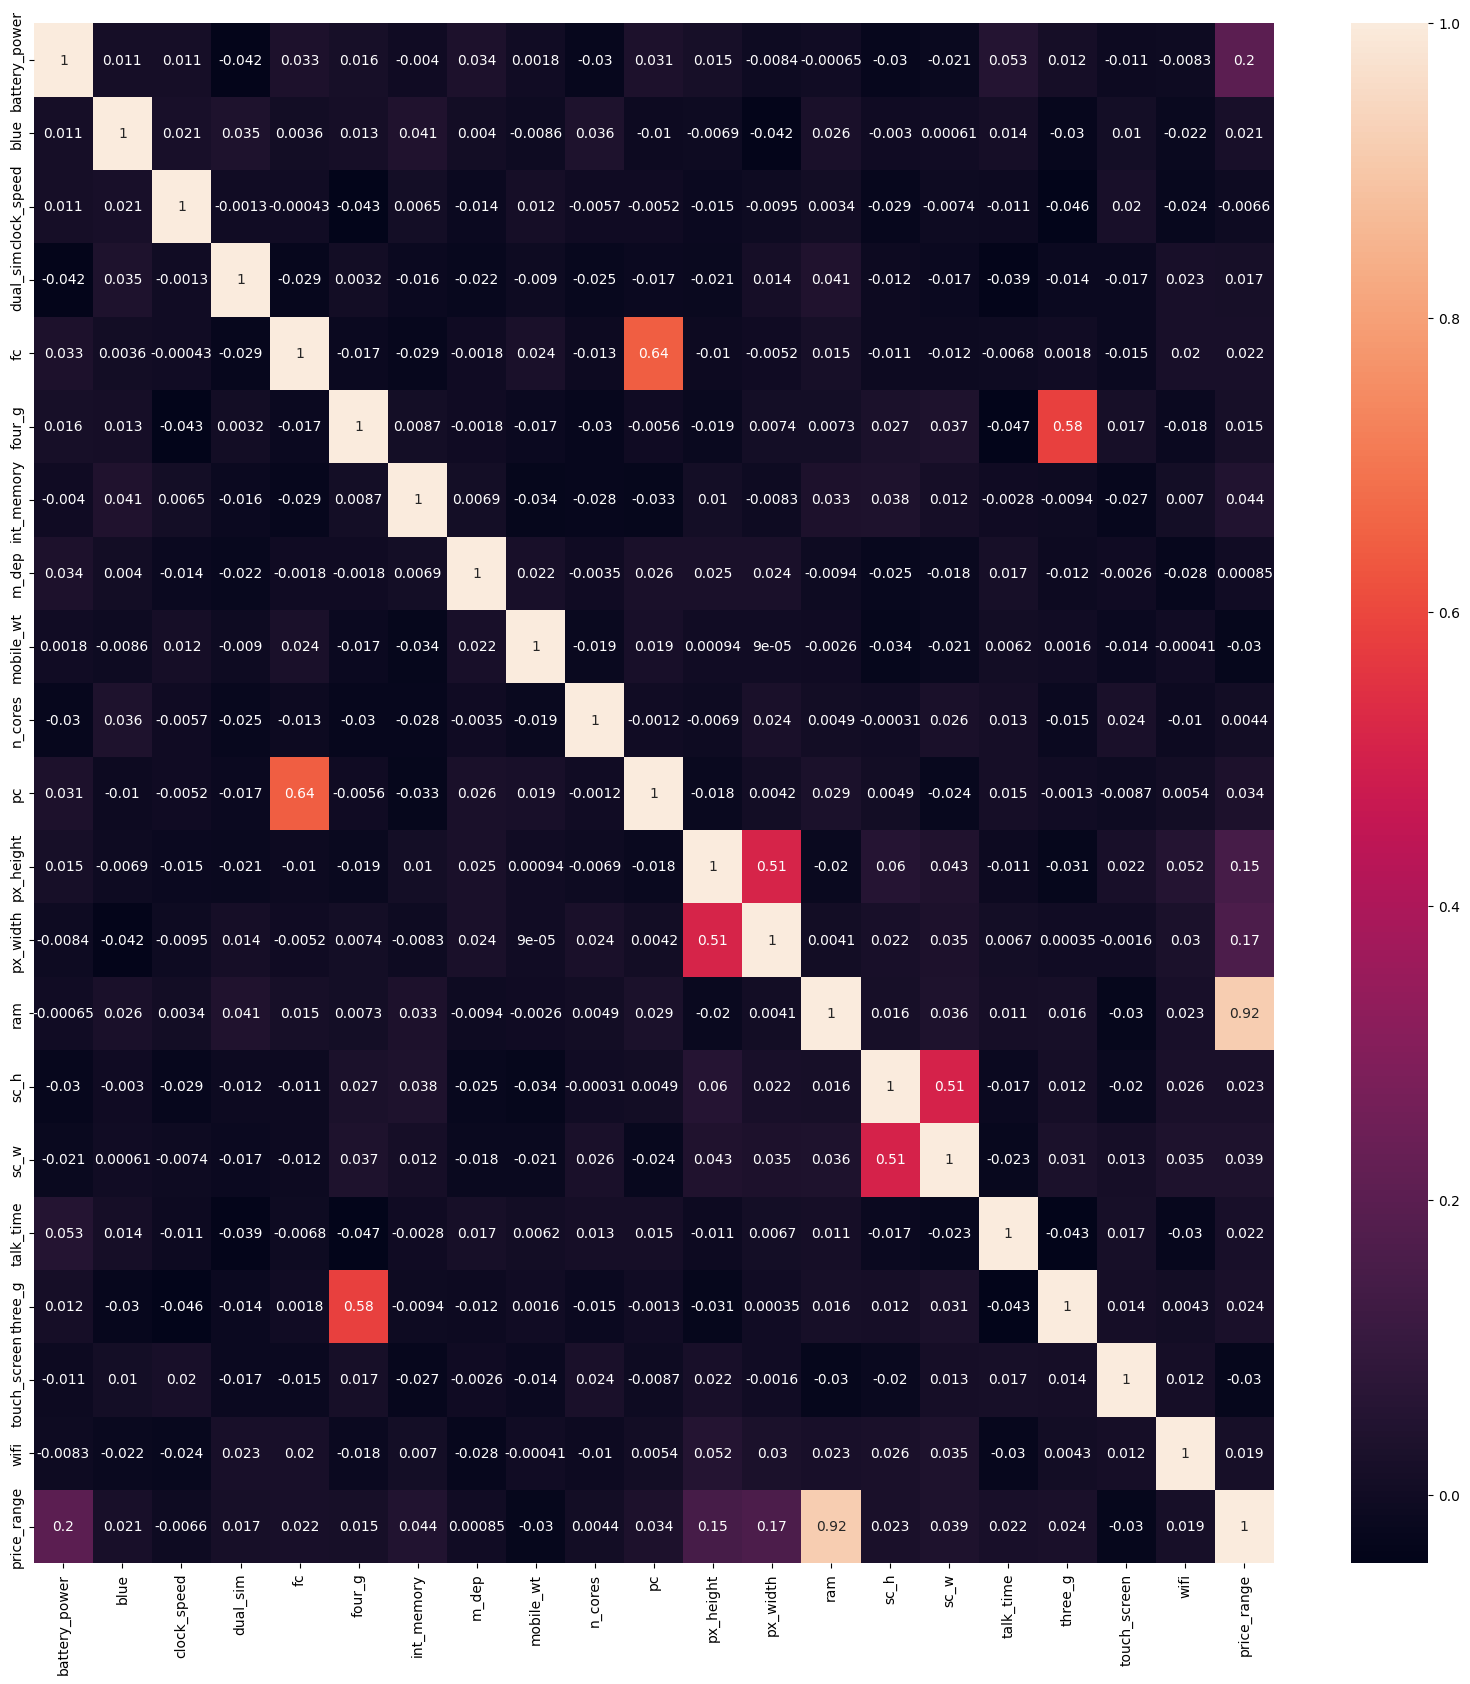

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),annot=True)
plt.show()


# **training data**

# **K Nearest Neighbours**

In [7]:
clf = KNeighborsClassifier()
clf_parameters = {
            'n_neighbors' : [5,7,9,11,13,15,16,17,18,19],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']
            } 
grid_search = GridSearchCV(estimator=clf,param_grid=clf_parameters,scoring='f1_macro',cv=5)
grid_search.fit(Train_Data_train,Traindata_classlabels_train)
print(grid_search.best_estimator_)
print("kNN score = ")
grid_search.best_estimator_.score(Train_Data_test,Traindata_classlabels_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')
kNN score = 


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

0.9483333333333334

In [10]:
pred = grid_search.best_estimator_.predict(Train_Data_test)
pred_acc = accuracy_score(Traindata_classlabels_test,pred)
pred_f = f1_score(Traindata_classlabels_test,pred,average='macro')
pred_p = precision_score(Traindata_classlabels_test,pred,average='macro')
pred_r = recall_score(Traindata_classlabels_test,pred,average='macro')
print(grid_search.best_estimator_)
print("prediction accuracy = "+str(pred_acc))
print("prediction f measure = "+str(pred_f))
print("prediction Precision= "+str(pred_p))
print("prediction Recall = "+str(pred_r))
print(confusion_matrix(pred,Traindata_classlabels_test))

KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')
prediction accuracy = 0.9483333333333334
prediction f measure = 0.9475408783295219
prediction Precision= 0.9476133013299572
prediction Recall = 0.9476524808900624
[[155   4   0   0]
 [  3 141   4   0]
 [  0   4 131  10]
 [  0   0   6 142]]


# **Decision Tree**

In [11]:
clf = DecisionTreeClassifier(random_state=40) 
clf_parameters = {
            'criterion':('gini', 'entropy'), 
            'max_features':('auto', 'sqrt', 'log2',None),
            'max_depth':(15,30,45,60),
            'ccp_alpha':(0.009,0.005,0.05)
            } 
grid_search = GridSearchCV(estimator=clf,param_grid=clf_parameters,scoring='f1_macro',cv=5)
grid_search.fit(Train_Data_train,Traindata_classlabels_train)
print(grid_search.best_estimator_)
print("Decision tree score = ")
grid_search.best_estimator_.score(Train_Data_test,Traindata_classlabels_test)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

DecisionTreeClassifier(ccp_alpha=0.005, criterion='entropy', max_depth=15,
                       random_state=40)
Decision tree score = 


0.8416666666666667

In [12]:
pred = grid_search.best_estimator_.predict(Train_Data_test)
pred_acc = accuracy_score(Traindata_classlabels_test,pred)
pred_f = f1_score(Traindata_classlabels_test,pred,average='macro')
pred_p = precision_score(Traindata_classlabels_test,pred,average='macro')
pred_r = recall_score(Traindata_classlabels_test,pred,average='macro')
print(grid_search.best_estimator_)
print("prediction accuracy = "+str(pred_acc))
print("prediction f measure = "+str(pred_f))
print("prediction Precision= "+str(pred_p))
print("prediction Recall = "+str(pred_r))
print(confusion_matrix(pred,Traindata_classlabels_test))

DecisionTreeClassifier(ccp_alpha=0.005, criterion='entropy', max_depth=15,
                       random_state=40)
prediction accuracy = 0.8416666666666667
prediction f measure = 0.8388519350678838
prediction Precision= 0.8391453985786946
prediction Recall = 0.8393924801159898
[[144  19   0   0]
 [ 14 115  10   0]
 [  0  15 109  15]
 [  0   0  22 137]]


# **Random forest classifier**

In [ ]:
clf = RandomForestClassifier(n_estimators=200)
clf_parameters = {
            'criterion':('entropy','gini'), 
            'max_features':('auto', 'sqrt', 'log2',None),      
            'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 300, num = 100)],
            'max_depth':(10,20,30,50,100,200)
            } 
grid_search = GridSearchCV(estimator=clf,param_grid=clf_parameters,scoring='f1_macro',cv=5)
grid_search.fit(Train_Data_train,Traindata_classlabels_train)
print(grid_search.best_estimator_)
print("random forest score = ")
grid_search.best_estimator_.score(Train_Data_test,Traindata_classlabels_test)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConv

In [20]:
pred = grid_search.best_estimator_.predict(Train_Data_test)
pred_acc = accuracy_score(Traindata_classlabels_test,pred)
pred_f = f1_score(Traindata_classlabels_test,pred,average='macro')
pred_p = precision_score(Traindata_classlabels_test,pred,average='macro')
pred_r = recall_score(Traindata_classlabels_test,pred,average='macro')
print(grid_search.best_estimator_)
print("prediction accuracy = "+str(pred_acc))
print("prediction f measure = "+str(pred_f))
print("prediction Precision= "+str(pred_p))
print("prediction Recall = "+str(pred_r))
print(confusion_matrix(pred,Traindata_classlabels_test))

RandomForestClassifier(criterion='entropy', max_depth=200, n_estimators=251)
prediction accuracy = 0.9016666666666666
prediction f measure = 0.9001360787814527
[[153  15   0   0]
 [  5 124   7   0]
 [  0  10 125  13]
 [  0   0   9 139]]


# **Gaussian Naive bayes**

In [13]:
clf = GaussianNB()
clf_parameters = {
            'var_smoothing':np.linspace(0,-13,num=100)
            }
grid_search = GridSearchCV(estimator=clf,param_grid=clf_parameters,scoring='f1_macro',cv=5)
grid_search.fit(Train_Data_train,Traindata_classlabels_train)
print(grid_search.best_estimator_)
print("gaussian score = ")
grid_search.best_estimator_.score(Train_Data_test,Traindata_classlabels_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

GaussianNB(var_smoothing=0.0)
gaussian score = 


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
495 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 265, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_v

0.82

In [14]:
pred = grid_search.best_estimator_.predict(Train_Data_test)
pred_acc = accuracy_score(Traindata_classlabels_test,pred)
pred_f = f1_score(Traindata_classlabels_test,pred,average='macro')
pred_p = precision_score(Traindata_classlabels_test,pred,average='macro')
pred_r = recall_score(Traindata_classlabels_test,pred,average='macro')
print(grid_search.best_estimator_)
print("prediction accuracy = "+str(pred_acc))
print("prediction f measure = "+str(pred_f))
print("prediction Precision= "+str(pred_p))
print("prediction Recall = "+str(pred_r))
print(confusion_matrix(pred,Traindata_classlabels_test))

GaussianNB(var_smoothing=0.0)
prediction accuracy = 0.82
prediction f measure = 0.8177226787830427
prediction Precision= 0.8180448808830298
prediction Recall = 0.8176771031618091
[[140  14   0   0]
 [ 18 109  19   0]
 [  0  26 106  15]
 [  0   0  16 137]]


# **Support vector machine**

In [7]:
clf = svm.SVC(class_weight='balanced',probability=True)
clf_parameters = {
            'C':np.logspace(-2,7,num=25,base=2),
            'gamma': [1,0.1,0.01,0.001],
            'kernel':('linear','rbf','polynomial','sigmoid')
            }
grid_search = GridSearchCV(estimator=clf,param_grid=clf_parameters,scoring='f1_macro',cv=5)
grid_search.fit(Train_Data_train,Traindata_classlabels_train)
print(grid_search.best_estimator_)
print("svm score = ")
grid_search.best_estimator_.score(Train_Data_test,Traindata_classlabels_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [18]:
pred = grid_search.best_estimator_.predict(Train_Data_test)
pred_acc = accuracy_score(Traindata_classlabels_test,pred)
pred_f = f1_score(Traindata_classlabels_test,pred,average='macro')
pred_p = precision_score(Traindata_classlabels_test,pred,average='macro')
pred_r = recall_score(Traindata_classlabels_test,pred,average='macro')
print(grid_search.best_estimator_)
print("prediction accuracy = "+str(pred_acc))
print("prediction f measure = "+str(pred_f))
print("prediction Precision= "+str(pred_p))
print("prediction Recall = "+str(pred_r))
print(confusion_matrix(pred,Traindata_classlabels_test))

SVC(C=1.189207115002721, class_weight='balanced', gamma=1, kernel='linear',
    probability=True)
prediction accuracy = 0.9733333333333334
prediction f measure = 0.9727250736601505
prediction precision = 0.9728386077275255
[[158   2   0   0]
 [  0 145   2   0]
 [  0   2 134   5]
 [  0   0   5 147]]


In [27]:
print(grid_search.best_estimator_)

LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')


# **Logistic regression**

In [8]:
clf = LogisticRegression(multi_class="multinomial",solver="lbfgs")
clf_parameters = {
     "C":np.linspace(start = 0.1, stop = 10, num = 100),
     "penalty":["l1","l2",'elasticnet'],
     'solver':['newton-cg','lbfgs','liblinear']}
grid_search = GridSearchCV(estimator=clf,param_grid=clf_parameters,scoring='f1_macro',cv=5)
grid_search.fit(Train_Data_train,Traindata_classlabels_train)
print(grid_search.best_estimator_)
print("logistic regression score = ")
grid_search.best_estimator_.score(Train_Data_test,Traindata_classlabels_test)

# l1 lasso l2 ridge

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')
logistic regression score = 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


0.9816666666666667

In [9]:
pred = grid_search.best_estimator_.predict(Train_Data_test)
pred_acc = accuracy_score(Traindata_classlabels_test,pred)
pred_f = f1_score(Traindata_classlabels_test,pred,average='macro')
pred_p = precision_score(Traindata_classlabels_test,pred,average='macro')
pred_r = recall_score(Traindata_classlabels_test,pred,average='macro')
print(grid_search.best_estimator_)
print("prediction accuracy = "+str(pred_acc))
print("prediction f measure = "+str(pred_f))
print("prediction Precision= "+str(pred_p))
print("prediction Recall = "+str(pred_r))
print(confusion_matrix(pred,Traindata_classlabels_test))

LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')
prediction accuracy = 0.9816666666666667
prediction f measure = 0.9814755264725349
prediction Precision= 0.9819641623142591
prediction Recall = 0.9811963270539585
[[157   3   0   0]
 [  1 145   0   0]
 [  0   1 136   1]
 [  0   0   5 151]]


In [23]:
#logmodel.score(Train_Data_test,Traindata_classlabels_test)

# **Prediction of data**

We have found that the support vector machine has the highest f value as compared to other models used in this project. So I am using this model to predict the target values of the test data

In [26]:
Test_Data=pd.read_csv('testdata.csv')
clf=LogisticRegression(C=0.1, multi_class='multinomial',solver='newton-cg')
clf.fit(Train_Data_train,Traindata_classlabels_train)
predict = clf.predict(Test_Data)
predict

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,